<a href="https://colab.research.google.com/github/YogeshRajgure/iNeuron_Assignments/blob/main/Assignment16_DecisionTree_YR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Survival in the Titanic Data Set\
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
url="https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"
titanic = pd.read_csv(url)

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df = titanic.copy()
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x=='male' else 0)
df['Age'].fillna(df['Age'].mean(), inplace=True)
df["Embarked"].fillna('S', inplace = True)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
for categories in list(df['Embarked'].unique()):
    df['Embarked_'+ categories]=np.where(df['Embarked']==categories,1,0)

df.drop(columns=['Embarked'], inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Embarked_Q
0,1,0,3,1,22.0,1,0,7.2500,1,0,0
1,2,1,1,0,38.0,1,0,71.2833,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,1,0,0
3,4,1,1,0,35.0,1,0,53.1000,1,0,0
4,5,0,3,1,35.0,0,0,8.0500,1,0,0


In [ ]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 355)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

d_clf = DecisionTreeClassifier()
d_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
d_clf.score(x_train, y_train)

1.0

In [ ]:
d_clf.score(x_test, y_test)

0.6480446927374302

As we can see that, we have a huge diff between both score.. this implies that our model is overfitted

### Lets do some hyper parameter tuning


In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_transform = scalar.fit_transform(X)

In [ ]:
x_train, y_train, x_test, y_test = train_test_split(x_transform, y, test_size=0.2, random_state=355)


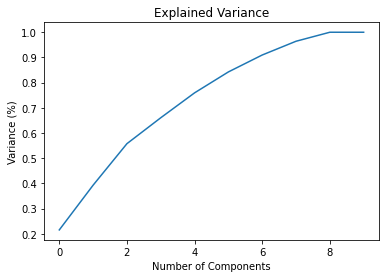

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(x_transform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

so, we will go with 7 features


In [ ]:
pca = PCA(n_components=7)
new_data = pca.fit_transform(x_transform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7'])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.2, random_state= 355)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
clf.score(x_train, y_train)

1.0

In [ ]:
clf.score(x_test,y_test)

0.6536312849162011

here we did increased the test score by 2 percent

## We can again try to use Grid search

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = clf,
                           param_grid = grid_param,
                           cv = 5,
                           n_jobs = -1)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [ ]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': 23,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'splitter': 'random'}

In [ ]:
grid_search.best_score_

0.8117305229981288

In [ ]:
new_clf = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = 19,
                                 min_samples_leaf= 8, 
                                 min_samples_split = 4,
                                 splitter ='random')
new_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=19, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [ ]:
new_clf.score(x_train, y_train)

0.8132022471910112

In [ ]:
new_clf.score(x_test, y_test)

0.7374301675977654

### Here we have the tuned model

# Training Score = 0.807

# Testing Score = 0.726